# loading a mnist dataset

# sgdg classifiers

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [3]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


only useable data is data and target

In [4]:
x,y = mnist['data'],mnist['target']
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
x = x.to_numpy()
print(type(x))

<class 'numpy.ndarray'>


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
somedigit = x[0]
some_of_digit_image = somedigit.reshape(28,28)

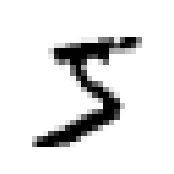

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(some_of_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [9]:
print(type(y))
y = y.astype(dtype='Int64')
print(type(y[0]))

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


In [10]:
x_train,y_train,x_test,y_test = x[:60000],y[:60000],x[60000:],y[60000:]

In [11]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [12]:
y_train_5 = (y_train ==  5).astype('int')
y_test_5 = (y_test == 5)

In [13]:
print(type(y_train_5))

<class 'pandas.core.series.Series'>


In [14]:
from sklearn.linear_model import SGDClassifier
sdg = SGDClassifier(random_state=42)
sdg.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [15]:
sdg.predict([somedigit])

array([1])

In [16]:
# performance measure
from sklearn.model_selection import cross_val_score
cross_val_score(sdg,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(sel,x,y=None):
        pass
    def predict(sel,x):
        return np.zeros((len(x),1),dtype=bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sdg,x_train,y_train_5,cv=3)

# Confusion metrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [26]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [25]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [27]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [28]:
y_score = cross_val_predict(sdg,x_train,y_train_5,cv=3,method='decision_function')

In [30]:
from sklearn.metrics import precision_recall_curve
precision, recall, theshold = precision_recall_curve(y_train_5,y_score) 

In [81]:
recall_90_per = recall[np.argmax(precision >= 0.90)]
threshold_90_per = theshold[np.argmax(precision >= 0.90)]

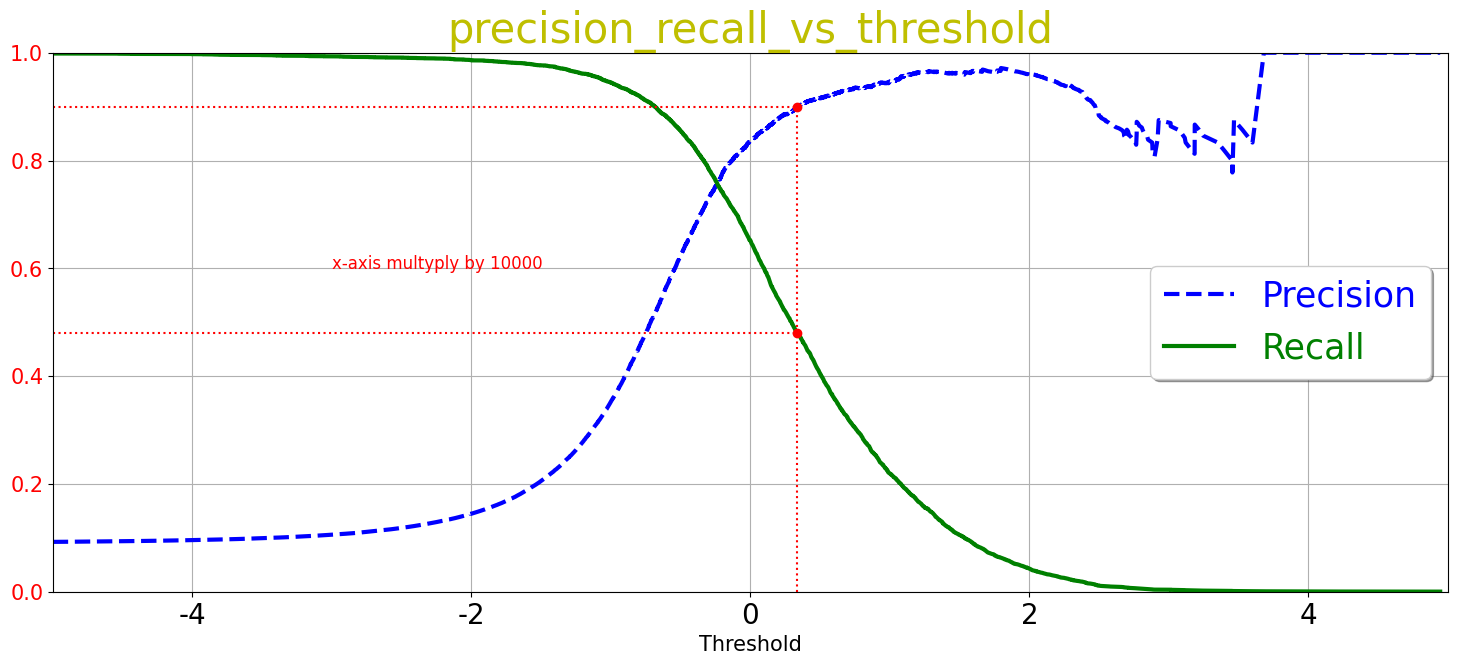

In [83]:
def precision_recall_vs_threshold(precision,recall,threshold):
    plt.figure(figsize=(18,7))
    plt.plot(threshold,precision[:-1],'b--',label='Precision',linewidth=3)
    plt.plot(threshold,recall[:-1],'g-',label='Recall',linewidth=3)
    plt.xlim(-50000,50000)
    plt.ylim(0,1)
    plt.xticks([-40000, -20000, 0, 20000, 40000], ['-4', '-2', '0', '2', '4'],fontsize=20)
    plt.yticks(fontsize=15,color='r')
precision_recall_vs_threshold(precision,recall,theshold)
plt.xlabel('Threshold',fontsize=15)
plt.title('precision_recall_vs_threshold',fontsize=30,color='y')
plt.legend(loc='center right',fontsize=25,shadow=True,labelcolor=['b','g'])
plt.grid()
plt.text(x=-30000,y=0.6,s='x-axis multyply by 10000', fontsize=12,color='r')
# highlight threshold
plt.plot([threshold_90_per, threshold_90_per], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_per], [0.9, 0.9], "r:")                          # Not shown
plt.plot([-50000, threshold_90_per], [recall_90_per, recall_90_per], "r:")      # Not shown
plt.plot([threshold_90_per], [0.9], "ro")                                       # Not shown
plt.plot([threshold_90_per], [recall_90_per], "ro")   
plt.show()

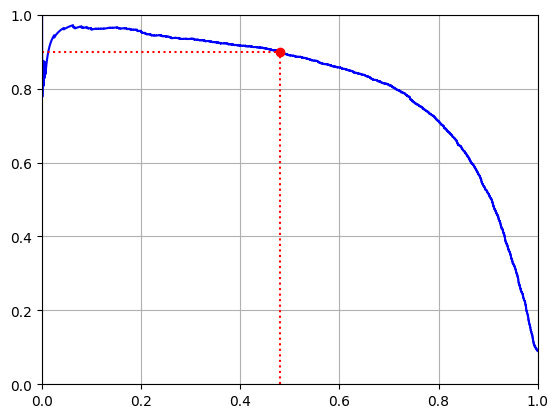

In [93]:
plt.plot(recall,precision,'b-')
plt.axis([0,1,0,1])
plt.plot([recall_90_per,recall_90_per],[0.,0.9],'r:')
plt.plot([0.0,recall_90_per],[0.9,0.9],'r:')
plt.plot([recall_90_per],[0.9],'ro')
plt.grid(True)
plt.show()

In [94]:
thresholds_90_precision = theshold[np.argmax(precision >= 0.90)]
y_train_pred_90=(y_score >= thresholds_90_precision)

In [95]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [96]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

# Roc curve 

another type of binary classifiers

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fcb408c-257d-4664-b332-b72bf303ace4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>